Nathalie Wing
OMDS DX699 AI for Leaders

# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

The Who, What, and How for the Valentines Spending Dataset (https://www.kaggle.com/datasets/aminasalamt/valentine-spending-dataset) is as follows:

WHO: the primary audience of the dataset is marketing and consumer insight teams at a retail company that wants actionable insights to inform targeted Valentine's Day promotions. Business stakeholder interested in seasonality of spending may also be interested in this dataset. This 'WHO' cares about spending trends, which demographic segments spend the most, and how spending categories differ by age and gender. The audience would want a clear visual with business recommendations based on this dataset, vs a more technical model. 

WHAT: They key story the dataset is trying to communicate is how Valentine's Day spending has changed over time, and how certain key demographics spend more on speciifc gift catgeories. The dataset contains data over multiple years and data across many product, age, and gender groups which can provide tailored insight into promotions and product offerings. 

HOW: This story can be communicated with visuals starting with a clear headline that reflects the key takeaway of the visuals produced to reflect the dataset. A possible visual includes a line graph that highlights spend trends over time, with Year on the X-axis and average spending per person on the Y-axis. This would show the overall increasing / decreasing trends and how overall spending hcanges across years. Another visual could look at age group spending preferences with a bar chart. This would compare spending categories by age groups, with age groups on the X-axis and % spending by category on the Y-axis, with the goal of highlighting which categories each age group prioritizes. A third visual could analyze gender-based differences. This could be visualized with a side-by-side bar chart of average % spending by category for men vs women. This can quickly highlight how spending preferences differ by gender. In the visualization, there should also be annotionas of key isnights directly on the visuals, and there should be a short Call to Action that drives an action as a result of findings in the visuals.

# 3. Homework - work with your own data

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [35]:
# Import data from Kaggle

import os
os.system("kaggle datasets download -d aminasalamt/valentine-spending-dataset")
os.system("unzip -o valentine-spending-dataset.zip")
valentine = pd.read_csv("valentines_day_spending_dataset.csv")


Dataset URL: https://www.kaggle.com/datasets/aminasalamt/valentine-spending-dataset
License(s): CC0-1.0
valentine-spending-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  valentine-spending-dataset.zip
  inflating: valentines_day_spending_dataset.csv  


In [36]:
# Get Datagframe Info & Describe
valentine.info()
valentine.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 200 non-null    int64  
 1   age                     200 non-null    int64  
 2   gender                  200 non-null    object 
 3   city                    200 non-null    object 
 4   relationship_status     200 non-null    object 
 5   celebrates_valentine    200 non-null    object 
 6   gift_type               144 non-null    object 
 7   spending_usd            200 non-null    float64
 8   mood                    200 non-null    object 
 9   plans                   200 non-null    object 
 10  previous_year_spending  200 non-null    float64
 11  sentiment_score         200 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 18.9+ KB


,user_id,age,gender,city,relationship_status,celebrates_valentine,gift_type,spending_usd,mood,plans,previous_year_spending,sentiment_score
count,200.000000,200.00000,200,200,200,200,144,200.000000,200,200,200.000000,200.000000
unique,NaN,NaN,2,5,3,2,3,NaN,4,4,NaN,NaN
top,NaN,NaN,Female,Rawalpindi,Taken,No,Flowers,NaN,Sad,Family,NaN,NaN
freq,NaN,NaN,107,47,73,108,59,NaN,53,67,NaN,NaN
mean,100.500000,31.23500,NaN,NaN,NaN,NaN,NaN,76.480950,NaN,NaN,73.784600,0.004900
std,57.879185,8.12155,NaN,NaN,NaN,NaN,NaN,40.515815,NaN,NaN,45.474292,0.611317
min,1.000000,18.00000,NaN,NaN,NaN,NaN,NaN,1.790000,NaN,NaN,0.650000,-0.990000
25%,50.750000,24.75000,NaN,NaN,NaN,NaN,NaN,38.712500,NaN,NaN,31.835000,-0.540000
50%,100.500000,31.00000,NaN,NaN,NaN,NaN,NaN,79.370000,NaN,NaN,77.170000,-0.045000
75%,150.250000,38.00000,NaN,NaN,NaN,NaN,NaN,112.117500,NaN,NaN,115.442500,0.575000


In [37]:
# Check for Duplicates in each column

for col in valentine.columns:
    dup_count = valentine[col].duplicated().sum()
    print(f"Duplicate values in column '{col}': {dup_count}")

Duplicate values in column 'user_id': 0
Duplicate values in column 'age': 172
Duplicate values in column 'gender': 198
Duplicate values in column 'city': 195
Duplicate values in column 'relationship_status': 197
Duplicate values in column 'celebrates_valentine': 198
Duplicate values in column 'gift_type': 196
Duplicate values in column 'spending_usd': 2
Duplicate values in column 'mood': 196
Duplicate values in column 'plans': 196
Duplicate values in column 'previous_year_spending': 3
Duplicate values in column 'sentiment_score': 73


In [38]:
# Mean, Median, Mode

print("Mean:")
print(valentine.mean(numeric_only=True))

print("Median:")
print(valentine.median(numeric_only=True))

print("Mode:")
print(valentine.mode(numeric_only=True).iloc[0])

Mean:
user_id                   100.50000
age                        31.23500
spending_usd               76.48095
previous_year_spending     73.78460
sentiment_score             0.00490
dtype: float64
Median:
user_id                   100.500
age                        31.000
spending_usd               79.370
previous_year_spending     77.170
sentiment_score            -0.045
dtype: float64
Mode:
user_id                    1.00
age                       19.00
spending_usd              35.56
previous_year_spending     2.10
sentiment_score            0.38
Name: 0, dtype: float64


In [39]:
# Get Missing Values

valentine.isnull().sum()

user_id                    0
age                        0
gender                     0
city                       0
relationship_status        0
celebrates_valentine       0
gift_type                 56
spending_usd               0
mood                       0
plans                      0
previous_year_spending     0
sentiment_score            0
dtype: int64

In [40]:
# Fill missing values for gift_type column
valentine["gift_type"] = valentine["gift_type"].fillna("Unknown")

# Check nulls

valentine.isnull().sum()


user_id                   0
age                       0
gender                    0
city                      0
relationship_status       0
celebrates_valentine      0
gift_type                 0
spending_usd              0
mood                      0
plans                     0
previous_year_spending    0
sentiment_score           0
dtype: int64

In [43]:
# Check for inconsistent data 

numeric_cols = valentine.select_dtypes(include=np.number).columns

for col in numeric_cols:
    negative_count = (valentine[col] < 0).sum()
    print(f"Negative values in '{col}': {negative_count}")


Negative values in 'user_id': 0
Negative values in 'age': 0
Negative values in 'spending_usd': 0
Negative values in 'previous_year_spending': 0
Negative values in 'sentiment_score': 105


In [44]:
# Encode Categorical Variables

categorical_cols = valentine.select_dtypes(include='object').columns
valentine_encoded = pd.get_dummies(valentine, columns=categorical_cols, drop_first=True)


In [45]:
# Class Imbalance Check

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(valentine[col].value_counts())


Value counts for gender:
gender
Female    107
Male       93
Name: count, dtype: int64

Value counts for city:
city
Rawalpindi    47
Karachi       45
Faisalabad    38
Lahore        36
Islamabad     34
Name: count, dtype: int64

Value counts for relationship_status:
relationship_status
Taken          73
Complicated    66
Single         61
Name: count, dtype: int64

Value counts for celebrates_valentine:
celebrates_valentine
No     108
Yes     92
Name: count, dtype: int64

Value counts for gift_type:
gift_type
Flowers       59
Unknown       56
Chocolates    44
Dinner        41
Name: count, dtype: int64

Value counts for mood:
mood
Sad        53
Neutral    52
Excited    48
Happy      47
Name: count, dtype: int64

Value counts for plans:
plans
Family     67
Alone      54
Friends    41
Date       38
Name: count, dtype: int64


In [46]:
# Final cleaned & encoded datframe for preview:
print("\nFinal cleaned & encoded dataset preview:")
print(valentine_encoded.head())


Final cleaned & encoded dataset preview:
   user_id  age  spending_usd  previous_year_spending  sentiment_score  \
0        1   21        118.99                    9.62            -0.59   
1        2   45         31.41                  128.50             0.36   
2        3   23         79.80                   53.06            -0.74   
3        4   27        120.61                   93.27            -0.61   
4        5   30         49.88                  137.06            -0.96   

   gender_Male  city_Islamabad  city_Karachi  city_Lahore  city_Rawalpindi  \
0        False           False          True        False            False   
1        False           False         False        False             True   
2        False           False         False         True            False   
3         True            True         False        False            False   
4         True           False         False        False             True   

   ...  celebrates_valentine_Yes  gift_type_

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

The example used from Storytelling with Data is the before and after bar chart showing how decluttering and highlighting improves clarity. This example uses basic numbers to help illustrate visual shape and structure. The goal of this visualization is to reproduce a simple bar chart showing several categories, one category clearly highlighted, minimal gridlines, clear title, and direct labeling. This demonstrates the key idea from the books introduction that data visualization should emphasize the message, not deocration. 

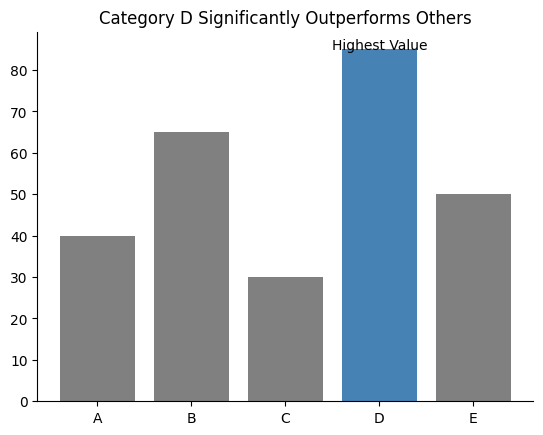

In [ ]:
import matplotlib.pyplot as plt

# Sample data 
categories = ['A', 'B', 'C', 'D', 'E']
values = [40, 65, 30, 85, 50]

# Create figure
plt.figure()

# Highlight one bar (like in the book)
colors = ['gray', 'gray', 'gray', 'steelblue', 'gray']

plt.bar(categories, values, color=colors)

# Add title (clear takeaway)
plt.title("Category D Significantly Outperforms Others")

# Remove unnecessary items on chart 
plt.xlabel("")
plt.ylabel("")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add annotation to highlight key insight
plt.text(3, 85, "Highest Value", ha='center')

plt.show()